In [16]:
import sys
!{sys.executable} -m pip install ffprobe


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: /Users/elaineran/.pyenv/versions/3.10.14/Library/Frameworks/Python.framework/Versions/3.10/bin/python -m pip install --upgrade pip


In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
import seaborn as sns
import matplotlib.pyplot as plt

/Users/elaineran/.pyenv/versions/3.10.14/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
notchloe = True

In [3]:
def not_chloe(b):
    if b is True:
        return "elaineran", "Desktop"
    else: 
        return "chloezhao", "summer 2024 project"

In [20]:
data_path = "/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/original spotify songs/"
metadata_path = "/Users/"+not_chloe(notchloe)[0] +"/"+not_chloe(notchloe)[1]+"/summer-project/top_50_2023.csv"

In [27]:
import os
import random
from pydub import AudioSegment

def cut_audio(input_file, output_path, file_name, i):
    # Load the audio file
    audio = AudioSegment.from_file(input_file)

    # Get the length of the audio in milliseconds
    audio_length = len(audio)

    # Generate random start time and ensure the cut is not longer than 20 seconds
    start_time = random.randint(0, audio_length)
    end_time = min(start_time + 20000, audio_length)  # Ensuring the cut does not exceed 20 seconds

    # Cut the audio segment
    cut_segment = audio[start_time:end_time]

    # Export the cut audio segment
    cut_segment.export(f"{output_path}/{file_name}_cut_{i}.wav", format="wav")

# Specify the directory containing the input audio files
input_folder = "/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/original spotify songs/"
# Specify the directory for output files
output_folder = "/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/spotify songs/"


# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
input_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

for input_file in input_files:
    # Get the full path of the input file
    input_file_path = os.path.join(input_folder, input_file)
    # Get the base name of the file without extension
    file_name, _ = os.path.splitext(input_file)

    # Perform 10 cuts for each file
    for i in range(1, 11):
        cut_audio(input_file_path, output_folder, file_name, i)


In [ ]:
import pandas as pd

# Load only specific columns from the CSV file into a DataFrame
spotify_2021_data = pd.read_csv('spotify_top50_2021.csv', usecols=['artist_name', 'track_name','key'])

spotify_2023_data = pd.read_csv('top_50_2023.csv', usecols=['artist_name', 'track_name','key'])

spotify_2018_data = pd.read_csv('top2018.csv', usecols=['artist_name', 'track_name','key'])

all_spotify_data = pd.concat([spotify_2021_data, spotify_2023_data, spotify_2018_data], ignore_index=True)

all_spotify_data.to_csv('all_spotify_data.csv', index=False)

In [4]:
data_path = "/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/spotify songs/"
metadata_path = "/Users/"+not_chloe(notchloe)[0] +"/"+not_chloe(notchloe)[1]+"/summer-project/all_spotify_data.csv"

In [5]:
def replace_last_hyphen(data_path):
    # List all files in the directory
    for filename in os.listdir(data_path):
        if " - " in filename:
            # Replace the last occurrence of " - " with "_"
            new_filename = filename[::-1].replace(" - "[::-1], "_"[::-1], 1)[::-1]
            os.rename(os.path.join(data_path, filename), os.path.join(data_path, new_filename))

In [6]:
replace_last_hyphen(data_path)

In [5]:
def load_data(data_path, metadata_path):
    features = []
    labels = []

    # Load the metadata
    metadata = pd.read_csv(metadata_path)

    # Iterate over each row in the metadata
    for index, row in metadata.iterrows():
        track_name = row['track_name']
        artist_name = row['artist_name']
        key_signature = row['key']

        # Assume there are 10 cuts for each track
        for cut in range(1, 11):
            # Construct the file path for each cut
            file_path = os.path.join(data_path, f"{track_name}_{artist_name}_cut_{cut}.wav")
            
            # Check if the file exists
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue

            # Load the audio file and resample it
            target_sr = 22050
            audio, sample_rate = librosa.load(file_path, sr=target_sr)

            # Check if the audio length is less than the default n_fft size
            if len(audio) < 2048:
                # Pad the audio file with zeros
                audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')

            # Extract MFCC features
            mfccs = librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=40)
            mfccs_scaled = np.mean(mfccs.T, axis=0)

            # Append features and labels
            features.append(mfccs_scaled)
            labels.append(key_signature)

    return np.array(features), np.array(labels)

In [28]:
features, labels = load_data(data_path, metadata_path)


# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)

File not found: /Users/elaineran/Desktop/summer-project/spotify songs/drivers license_Olivia Rodrigo_cut_9.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_1.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_2.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_3.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_4.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_5.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_7.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_8.wav
File not found: /Users/elaineran/Desktop/summer-project/spotify songs/good 4 u_Olivia Rodrigo_cut_9.wav
File not found: /Users/elaineran/Desktop/summer-project/s

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_onehot, test_size=0.2, random_state=42)


In [30]:
input_shape = (X_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [33]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 2s 58ms/step - loss: 6.0728 - accuracy: 0.1073 - val_loss: 2.4665 - val_accuracy: 0.1566
Epoch 2/100
25/25 [==============================] - 0s 14ms/step - loss: 2.8657 - accuracy: 0.1806 - val_loss: 2.3659 - val_accuracy: 0.1717
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 2.5036 - accuracy: 0.2197 - val_loss: 2.2247 - val_accuracy: 0.3182
Epoch 4/100
25/25 [==============================] - 0s 13ms/step - loss: 2.3722 - accuracy: 0.2437 - val_loss: 2.0916 - val_accuracy: 0.3687
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 2.1916 - accuracy: 0.2803 - val_loss: 1.9679 - val_accuracy: 0.4848
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 2.0144 - accuracy: 0.3750 - val_loss: 1.7945 - val_accuracy: 0.4697
Epoch 7/100
25/25 [==============================] - 0s 14ms/step - loss: 1.8029 - accuracy: 0.4508 - val_loss: 1.5854 - val_accuracy: 0.5606
Epoch 

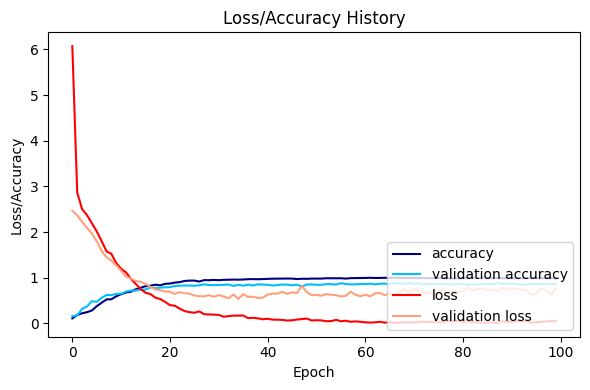

In [34]:
# plotting from history

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")


plots = plot1_loss + plot1_val_loss
labs = [plot.get_label() for plot in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History")
plt.tight_layout()
axis1.legend(loc='lower right')
#plt.savefig("/Users/chloezhao/summer 2024 project/summer-project/figures/Loss-Accuracy-Notes")
plt.show()

In [35]:
test_predictions = model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [36]:
predicted_class_indices = np.argmax(test_predictions, axis=1)
predicted_classes = le.inverse_transform(predicted_class_indices)
print(predicted_classes)

[ 1  1  2 11 11  9 10  4  8  2  8  9  1  1  5  2  4  8 11  6  6  6  1  4
  9  6  7  7  4  6  9  7  6  7  1  2  4  7 11  4  9  1 11  0  8  0  1  6
  7  5  8  6  0  0  9  8  5  0  0  7  9 11  8  6  6  6  9  0  0  1  0  1
  0 11  8 11  6 10  6  5  1 11  1  6  3  9  6  1  0  9  7  9  4  2  9  2
  2  6 11  2  0  8 10  0  5  6  7  5  5  4 11  8  7  4  1  1  8  2  2  5
 11  1 11  9 11  1  0  0  5  0  5  8  8  8  8  4  1  6  8  7 11  6  8  9
  5  6 10  4  0  6  9  8  1  9  7  4  8  1  9  1  0 11  1 10  6  0  1  8
  8  6  1  1  5  7  2  7  0  6  8 11  5  9  6 11  0  0  7  0  0  1  5  4
  8  9  5 11  8  1]


In [37]:
y_true = np.argmax(y_test, axis=1)
true_classes = le.inverse_transform(y_true)
print(true_classes)

[ 1  1  2 11 11  9 10  4  8  2  8  9  1  4  5  2  9  7 11  6  7  4  1  4
  9  6  7  7  1  6  9  7  6  7  1  2  4  7 11  4  9  1  9  0  8  0  1  6
  7  5  8  6  0  0  9  7  5  0  0  7  9 11  8  6  4  6  9  9  0  1  0  1
  4 11  8 11  6 10  6  5  1 11  1  5  3  7  6  1  0  9  7  9  4  2  9  2
 11  6 11  2  0  8 10  4  5  6  7  5  5  4 11  8 10  4  1  1  8  2  2  5
 11  1 11  2  0  1  0  0  5  0  5  7  8  8  8  4  1  6  8  7 11  6  8  9
  5  6 10  4  0  6  9  1  0  9  7  4  8  1  9  1  7 11  1 10  6  0  1  8
  8  6  1  2  5  7  2  7  5  6  8 11  9  9  2 11  0  0  7  0  9  1  5  4
  2  9  5 11  8  1]


In [38]:
#unique_labels = np.unique(np.concatenate([y_true, predicted_class_indices]))
unique_labels = np.arange(12)


# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_class_indices)
print("Accuracy:", accuracy)


# Generate a classification report
#print(classification_report(y_true, predicted_class_indices, labels=unique_labels, target_names=le.inverse_transform(unique_labels)))


# Confusion matrix
cm = confusion_matrix(y_true, predicted_class_indices, labels=unique_labels)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8585858585858586
Confusion Matrix:
 [[18  1  0  0  0  0  0  0  0  0  0  1]
 [ 0 24  0  0  1  0  0  0  1  0  0  0]
 [ 0  1 10  0  0  0  1  0  1  1  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 2  1  0  0 11  0  2  0  0  0  0  0]
 [ 1  0  0  0  0 14  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0]
 [ 1  0  0  0  0  0  1 14  3  1  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0]
 [ 2  0  0  0  1  1  0  0  0 17  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  5  0]
 [ 0  0  1  0  0  0  0  0  0  0  0 17]]


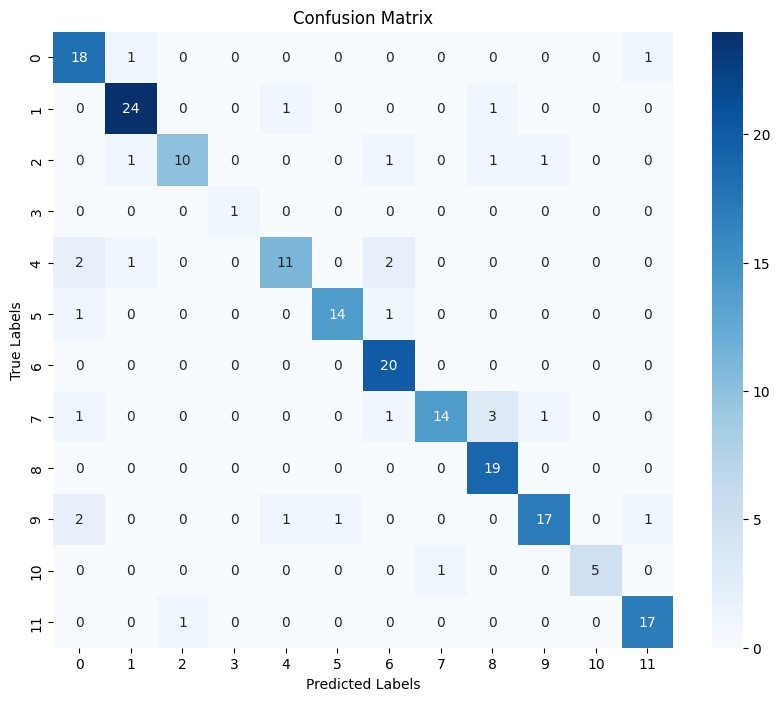

In [39]:


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/figures/Confusion-Matrix-Notes")
plt.show()


In [42]:
test_audio_path = "/Users/elaineran/Desktop/summer-project/queen.wav"
audio, _ = librosa.load(test_audio_path, sr=22050)
# Pad the audio file if necessary
if len(audio) < 2048:
    audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=40)
mfccs_scaled = np.mean(mfccs.T, axis=0)
mfccs_scaled = mfccs_scaled.reshape(1, mfccs_scaled.shape[0], 1)

# Predict the chord
predicted_probabilities = model.predict(mfccs_scaled)
predicted_label = np.argmax(predicted_probabilities, axis=1)
predicted_note = le.inverse_transform(predicted_label)

print(f"The predicted note is: {predicted_note[0]}")

/var/folders/2g/61277p7n6xzbr9jbzf8t7s340000gn/T/ipykernel_58966/3663028241.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(test_audio_path, sr=22050)
/Users/elaineran/.pyenv/versions/3.10.14/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 [==============================] - 0s 60ms/step
The predicted note is: 2
